<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_09_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorDataset

In [1]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

We will create our own data

In [2]:
# Create a dataset in Numpy
nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations, nFeatures)

data.shape

(100, 20)

In [3]:
# Convert the data into pytorch tensor
dataT = torch.tensor(data)

# Print out some information
print("Numpy Data")
print(type(data))
print()
print(data.shape) # numpy -> .shape
print()
print(data.dtype) # The 

Numpy Data
<class 'numpy.ndarray'>

(100, 20)

float64


In [4]:
print("Tensor Data")
print(type(dataT))
print()
print(dataT.size()) # torch -> size() dataT.shape also works
print()
print(dataT.dtype)

Tensor Data
<class 'torch.Tensor'>

torch.Size([100, 20])

torch.float64


In [5]:
# Converting datatypes
dataT2 = torch.tensor(data).float()
print(dataT2.dtype)

torch.float32


In [6]:
# .long() works for integers, like we have always used to create labels
dataT3 = torch.tensor(data).long()
print(dataT3.dtype)

torch.int64


In [7]:
# Numpy Data
data

array([[-0.08029205, -0.69960588,  1.65910279, ...,  0.86221458,
        -1.45401579, -1.01548802],
       [ 0.78313873,  0.27158972,  1.91530523, ...,  0.19302384,
        -0.7366723 , -0.63850443],
       [-0.23849146,  0.36543426,  0.32995829, ..., -0.81126913,
         1.1869205 , -0.64252183],
       ...,
       [-0.66935577, -2.93705373, -0.37117   , ...,  1.09527481,
         0.6634165 ,  0.18369102],
       [ 0.15902976, -1.96479602, -0.81728775, ..., -0.0169409 ,
        -1.62447435,  0.33639911],
       [-0.94652106,  0.32754687,  0.66303015, ..., -1.99560957,
        -1.15911058,  0.03529284]])

In [8]:
# Tensor
dataT2

tensor([[-0.0803, -0.6996,  1.6591,  ...,  0.8622, -1.4540, -1.0155],
        [ 0.7831,  0.2716,  1.9153,  ...,  0.1930, -0.7367, -0.6385],
        [-0.2385,  0.3654,  0.3300,  ..., -0.8113,  1.1869, -0.6425],
        ...,
        [-0.6694, -2.9371, -0.3712,  ...,  1.0953,  0.6634,  0.1837],
        [ 0.1590, -1.9648, -0.8173,  ..., -0.0169, -1.6245,  0.3364],
        [-0.9465,  0.3275,  0.6630,  ..., -1.9956, -1.1591,  0.0353]])

In [9]:
# Integer Tensor
dataT3

tensor([[ 0,  0,  1,  ...,  0, -1, -1],
        [ 0,  0,  1,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  1,  0],
        ...,
        [ 0, -2,  0,  ...,  1,  0,  0],
        [ 0, -1,  0,  ...,  0, -1,  0],
        [ 0,  0,  0,  ..., -1, -1,  0]])

In [10]:
# Convert the tensors into PyTorch Datasets
# dataset = TensorDataset(data) # This is not a tensor, so cannot be converted
# We need tensor for that
dataset = TensorDataset(dataT)
# Dataset is a two-element tuple comprising of data and labels
dataset.tensors

(tensor([[-0.0803, -0.6996,  1.6591,  ...,  0.8622, -1.4540, -1.0155],
         [ 0.7831,  0.2716,  1.9153,  ...,  0.1930, -0.7367, -0.6385],
         [-0.2385,  0.3654,  0.3300,  ..., -0.8113,  1.1869, -0.6425],
         ...,
         [-0.6694, -2.9371, -0.3712,  ...,  1.0953,  0.6634,  0.1837],
         [ 0.1590, -1.9648, -0.8173,  ..., -0.0169, -1.6245,  0.3364],
         [-0.9465,  0.3275,  0.6630,  ..., -1.9956, -1.1591,  0.0353]],
        dtype=torch.float64),)

In [11]:
len(dataset.tensors)

1

In [12]:
# We can access all the numbers by indexing on zero element of the tuple
dataset.tensors[0]

tensor([[-0.0803, -0.6996,  1.6591,  ...,  0.8622, -1.4540, -1.0155],
        [ 0.7831,  0.2716,  1.9153,  ...,  0.1930, -0.7367, -0.6385],
        [-0.2385,  0.3654,  0.3300,  ..., -0.8113,  1.1869, -0.6425],
        ...,
        [-0.6694, -2.9371, -0.3712,  ...,  1.0953,  0.6634,  0.1837],
        [ 0.1590, -1.9648, -0.8173,  ..., -0.0169, -1.6245,  0.3364],
        [-0.9465,  0.3275,  0.6630,  ..., -1.9956, -1.1591,  0.0353]],
       dtype=torch.float64)

In [13]:
# Let's add labels to the data (This is a list)
labels = torch.ceil(torch.linspace(0.01,4, nObservations))
labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [14]:
# The above is just a list, it is not a tensor with orientation
# Lets transform it into an actual matrix (column vector)
labels = labels.reshape((len(labels),1))
print(labels.T)
# Two sets of square brackets :)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])


In [15]:
# Let's create a new dataset
dataset = TensorDataset(dataT, labels)
print(dataset.tensors[0].size())
print()
print(dataset.tensors[1].size())

torch.Size([100, 20])

torch.Size([100, 1])


In [16]:
# See only first data with all its features and its labels
dataset[0]

(tensor([-0.0803, -0.6996,  1.6591,  1.2138,  0.0203, -0.4310,  0.5662, -0.3363,
         -0.9245,  0.4156, -2.5209, -1.9199, -0.3656, -1.5821, -0.7340,  1.2734,
         -0.3347,  0.8622, -1.4540, -1.0155], dtype=torch.float64),
 tensor([1.]))

In [17]:
# Now that we added the labels, length of the tensor dataset is 2
len(dataset.tensors)

2

In [18]:
# Just for comparison with a non-matrix ordered set of numbers
print(np.shape(np.random.randint(5,size=nObservations)))

(100,)


# DataLoaders

In [19]:
# Create a DataLoader Object
batchsize = 25
dataloader = DataLoader(dataset, batch_size = batchsize) #shuffle=True,drop_last=True)
dataloader

In [20]:
dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

In [21]:
dataloader.dataset.tensors[1].size()

torch.Size([100, 1])

In [22]:
# Use the dataloader object in a for loop to break up the data inro minibatches
for dat, labs in dataloader:
    print("Batch Info")
    print(dat.size())
    print(labs.size())
    print()

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])



In [23]:
# We can also have a look at the labels (remember, unshuffleed)
for dat, labels in dataloader:
    print(labels.T)
    print()

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])

tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])

tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])



In [24]:
# Now lets try with shuffling and see what happens
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)

In [25]:
for dat,labs in dataloader:
    print(labs.T)
    print()

tensor([[1., 3., 2., 1., 1., 4., 1., 3., 3., 4., 1., 1., 1., 4., 3., 2., 3., 3.,
         3., 1., 4., 2., 2., 3., 2.]])

tensor([[3., 3., 2., 4., 3., 4., 4., 2., 1., 4., 3., 3., 3., 4., 2., 3., 2., 4.,
         1., 1., 4., 1., 1., 2., 2.]])

tensor([[3., 4., 2., 3., 4., 3., 1., 1., 1., 2., 1., 3., 4., 2., 2., 3., 1., 4.,
         4., 1., 3., 2., 4., 4., 1.]])

tensor([[2., 3., 2., 4., 3., 1., 2., 2., 4., 3., 2., 4., 1., 4., 4., 3., 2., 1.,
         2., 2., 2., 4., 1., 1., 4.]])



In [26]:
# To get only one batch for testing (as we have been doing for along time)
dat,labs = next(iter(dataloader))
labs.T

tensor([[2., 2., 2., 1., 2., 1., 4., 4., 1., 3., 4., 2., 3., 1., 3., 1., 3., 2.,
         4., 1., 2., 4., 2., 3., 4.]])

# Data Size and Network Size

In this case we are going to train a model by parametrically varying the depth while keeping the number of units constant (80). 

We will also parametrically vary the amount of data from N=50 to N=550

In [27]:
# define a function to create the dataset
def createSomeData(nPerClust):
    A = [1,1]
    B = [5,1]
    C = [4,4]

    # Generate data
    a = [A[0] + np.random.randn(nPerClust), A[1] + np.random.randn(nPerClust)]
    b = [B[0] + np.random.randn(nPerClust), B[1] + np.random.randn(nPerClust)]
    c = [C[0] + np.random.randn(nPerClust), C[1] + np.random.randn(nPerClust)]

    # Define the true labels
    labels_np = np.hstack((np.zeros((nPerClust)),
                           np.ones((nPerClust)),
                           np.ones((nPerClust))+1))
    
    # Concatenate everything intp a matrix
    data_np = np.hstack((a,b,c)).T

    # Put all the outputs into a dictionary
    output = {}
    output["data"] = torch.tensor(data_np).float()
    output["labels"] = torch.tensor(labels_np).long()

    # Split the data into training and test set
    train_data, test_data, train_labels, test_labels = train_test_split(output["data"], output["labels"], test_size=0.1)

    # Convert them into PyTorch datasets (they have already been converted into tensors)
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate them into DataLoader Objects
    batchsize=8
    output["train_data"] = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
    output["test_data"] = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return output

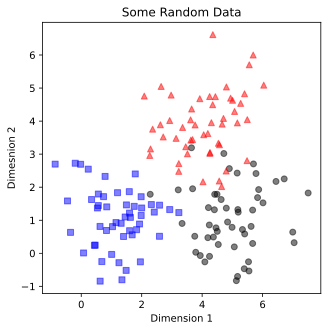

In [28]:
# Check whether the function works
theData = createSomeData(50)

data = theData["data"]
labels = theData["labels"]

# Plot everything
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs", alpha=0.5)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko", alpha=0.5)
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], "r^", alpha=0.5)
plt.title("Some Random Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimesnion 2")
plt.show()

In [29]:
# Create a class for the model
def createTheModel(nUnits,nLayers):

    class QwertyNet(nn.Module):
        def __init__(self, nUnits, nLayers):
            super().__init__()

            # Create a dictionary to store the layers
            self.layers = nn.ModuleDict()
            self.nLayers = nLayers

            # Define the input Layer
            self.layers["input"] = nn.Linear(2,nUnits)

            # Define the hidden layers
            for i in range(nLayers):
                self.layers[f"hidden{i}"] = nn.Linear(nUnits, nUnits)

            # Output Layer
            self.layers["output"] = nn.Linear(nUnits,3)

        # Forward Pass
        def forward(self,x):
            
            # Input Layer
            x = self.layers["input"](x)

            # Hidden Layers
            for i in range(self.nLayers):
                x = F.relu(self.layers[f"hidden{i}"](x))
            
            # Output Layer
            x = self.layers["output"](x)
            return x
    
    # Create the model Instance
    net = QwertyNet(nUnits,nLayers)

    # Define the loss function
    lossfun = nn.CrossEntropyLoss()

    # Define the Optimizer
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

    return net, lossfun, optimizer

In [30]:
# Test the model to make sure it is working
nUnitsPerLayer = 12
nLayers = 4

net, lossfun, opt = createTheModel(nUnitsPerLayer, nLayers)
print(net)
input = torch.rand(10,2)
net(input)

QwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[ 0.2583,  0.0146, -0.0036],
        [ 0.2582,  0.0149, -0.0048],
        [ 0.2572,  0.0168, -0.0032],
        [ 0.2587,  0.0138, -0.0042],
        [ 0.2583,  0.0147, -0.0048],
        [ 0.2562,  0.0186, -0.0018],
        [ 0.2598,  0.0123, -0.0050],
        [ 0.2577,  0.0158, -0.0026],
        [ 0.2596,  0.0126, -0.0051],
        [ 0.2595,  0.0127, -0.0051]], grad_fn=<AddmmBackward0>)

In [31]:
# Define a function to train the model
def function2TrainTheModel(nUnits,nLayers):

    # Define the number of epochs
    numepochs = 50

    # Create new model
    net, lossfun, optimizer = createTheModel(nUnits, nLayers)

    # Initialize the losses
    losses = np.zeros((numepochs, 2))
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # Initialize batch losses and accuracy
        batchLoss = []
        batchAcc = []

        # Loop over the minibatches
        for X,y in train_data:

            # Forward Pass
            yHat = net(X)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this specific batch
            batchLoss.append(loss.item())

            # Compute batch Accuracy
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        # End of the batch

        # Train accuracy for one epoch
        trainAcc.append(np.mean(batchAcc))
        losses[epochi,0] = np.mean(batchLoss)

        # Test Accuracy
        X,y = next(iter(test_data))
        with torch.no_grad():
            yHat = net(X)
        
        # Test Accuracy
        testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        
        # Test Loss
        losses[epochi,1] = lossfun(yHat,y).item()
    # End of epochs

    # Return the model output
    return trainAcc, testAcc, losses, net

In [32]:
# Test the model again to make sure it works
# Generate some random data
theData = createSomeData(200)
train_data = theData["train_data"]
test_data = theData["test_data"]

# Run the model
trainAcc, testAcc, losses, net = function2TrainTheModel(80,1)

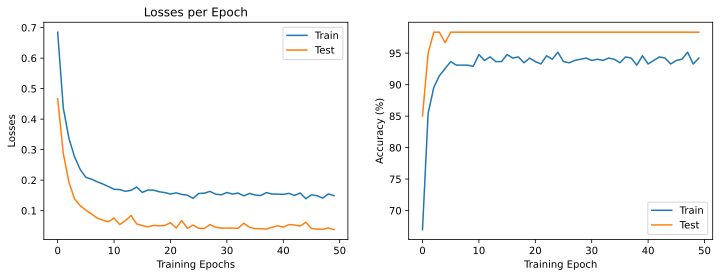

In [33]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(losses)
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Training Epochs")
ax[0].set_title("Losses per Epoch")
ax[0].legend(["Train", "Test"])

ax[1].plot(trainAcc,label="Train")
ax[1].plot(testAcc, label="Test")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Training Epoch")
ax[1].legend()

plt.show()

In [34]:
# Define metaparameters before running the experiment
nNodesInModel = 80
layersRange = [1,5,10,20]
nDataPoints = np.arange(50,551,50)

# Create a legend for plotting later
legend = []

# Print out model architectures
for lidx,layers in enumerate(layersRange):

    # Create Model
    unitsperlayer = int(nNodesInModel/layersRange[lidx])
    net = createTheModel(unitsperlayer,layers)[0]

    # Count the parameters
    nparams = np.sum([p.numel() for p in net.parameters() if p.requires_grad])

    legend.append("%s layers, %s units, %s params" %(layers, unitsperlayer, nparams))
    print("This model will have %s layers, each with %s units, totalling %s parameters" %(layers, unitsperlayer, nparams))

This model will have 1 layers, each with 80 units, totalling 6963 parameters
This model will have 5 layers, each with 16 units, totalling 1459 parameters
This model will have 10 layers, each with 8 units, totalling 771 parameters
This model will have 20 layers, each with 4 units, totalling 427 parameters


In [35]:
# Initialize the results matrix
results = np.zeros((len(nDataPoints), len(layersRange),2))

for didx,pnts in enumerate(nDataPoints):

    # Create the data
    theData = createSomeData(pnts)
    train_data = theData["train_data"]
    test_data = theData["test_data"]

    # Loop over the layers
    for lidx,layers in enumerate(layersRange):

        unitsperlayer = int(nNodesInModel/layersRange[lidx])
        trainAcc, testAcc, losses, net = function2TrainTheModel(unitsperlayer, layers)

        # Average of the last 5 accuracies and losses
        results[didx,lidx,0] = np.mean(testAcc[-5:])
        results[didx,lidx,1] = np.mean(losses[-5:])

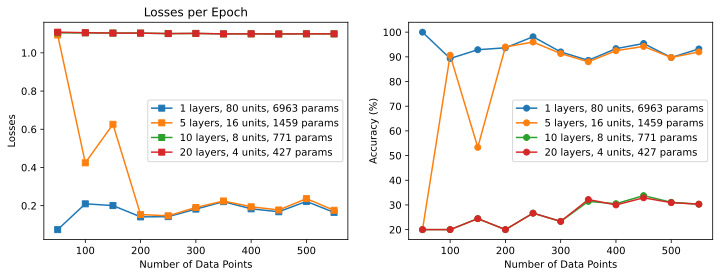

In [36]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(nDataPoints, results[:,:,1], "s-")
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Number of Data Points")
ax[0].set_title("Losses per Epoch")
ax[0].legend(legend)

ax[1].plot(nDataPoints, results[:,:,0], "o-")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Number of Data Points")
ax[1].legend(legend)

plt.show()
# A wide network performs very well, while very deep network performs horribly
# Hard to predict how the model is going to perform; it depends strongly on the nature of the data

# Code Challenge: Unbalanced Data

Use the wine quality dataset and train a DL model using leaky_relu activation function, Adam optimizer, lr = 0.001 and 500 epochs for training.

Create a python function that will create and expport train/test dataloaders with a specified quality threshold for binarizing bad/good. Use three different thresholds: 4.5, 5.5 and 6.5 and plot the results. 

In [37]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep = ";")
# Remove the extreme outliers (as explored many weeks ago)
data = data[data["total sulfur dioxide"]<200]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
# Z-Score all columns except quality column
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5


In [39]:
# Write a function to create the dataset we want
def createAdataset(qualThreshold):

    # Create a new column for binarized quality
    data["boolQuality"] = 0

    tmp = (data["quality"] > qualThreshold).astype(int)
    data["boolQuality"] = tmp

    # Convert from pandas dataframe to tensor
    dataT = torch.tensor(data[cols2zscore].values).float()
    labels = torch.tensor(data["boolQuality"].values).float()
    # Turn labels into a matrix
    labels = labels[:,None]

    # Split the data
    train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size=0.1)

    # Convert into PyTorch datasets
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate into dataloader objects
    batchsize = 8
    train_loader = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return train_loader, test_loader

In [40]:
# Test to see whats going on
train_loader, test_loader = createAdataset(6)

# Get the number of high and low quality wines
qualityRatings = train_loader.dataset.tensors[1].detach()
print("Low-Rated Wines {}".format(torch.sum(qualityRatings==0).item()))
print("High-Quality Wines {}".format(torch.sum(qualityRatings==1).item()))

Low-Rated Wines 1247
High-Quality Wines 190


In [41]:
# Test to see whats going on: The most ballanced option
train_loader, test_loader = createAdataset(5)

# Get the number of high and low quality wines
qualityRatings = train_loader.dataset.tensors[1].detach()
print("Low-Rated Wines {}".format(torch.sum(qualityRatings==0).item()))
print("High-Quality Wines {}".format(torch.sum(qualityRatings==1).item()))

Low-Rated Wines 681
High-Quality Wines 756


In [42]:
# Define a class for the model
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        # define the input layer
        self.input = nn.Linear(11,16)

        # Define 2 hidden layers
        self.fc1 = nn.Linear(16,32)
        self.fc2 = nn.Linear(32,32)

        # Define the output layer
        self.output = nn.Linear(32,1)

    # Define the forward pass
    def forward(self,x):
        x = F.leaky_relu(self.input(x))
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        return self.output(x)

In [43]:
# Define the function to train the model

# Define the number of epochs
numepochs = 500

def trainTheModel():

    # Define loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(winenet.parameters(),lr=0.001)

    # INitialize the losses
    losses = []
    trainAcc = []
    testAcc = []

    # Iterate over the epochs
    for epochi in range(numepochs):

        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward Pass
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            # BackPropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Batch loss and accuracy
            batchLoss.append(loss.item())
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of a batch

        # Train accuracy for this epoch
        trainAcc.append(np.mean(batchAcc))

        # LOsses for this epocj
        losses.append(np.mean(batchLoss))

        # Test
        X,y = next(iter(test_loader))
        with torch.no_grad():
            yHat = winenet(X)
        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
    # Overall Output
    return trainAcc, testAcc, losses

In [44]:
# Create the data to test everything is working
train_loader, test_loader = createAdataset(5)

# Create a model and train it
winenet = ANNwine()
trainAcc, testAcc, losses = trainTheModel()

# Compute accuracy per quality type
X,y = next(iter(test_loader))
yHat = winenet(X)
itemAccuracy = ((yHat>0)==y).float()

perQualAcc = [100*torch.mean(itemAccuracy[y==0]),100*torch.mean(itemAccuracy[y==1])]

perQualAcc

[tensor(72.7273), tensor(78.3133)]

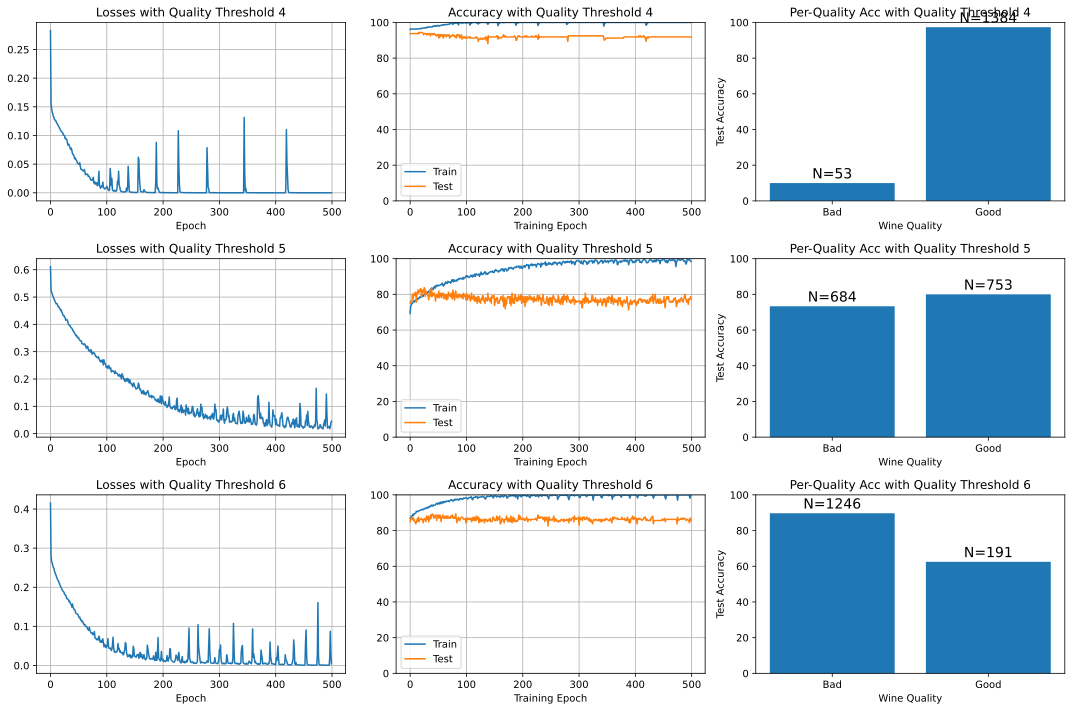

In [45]:
# Run the Whole Thing

fig,ax = plt.subplots(3,3,figsize=(15,10))

# Quality Thresholds
qualityThresholds = [4,5,6]

# Loop over
for quali in range(len(qualityThresholds)):
    train_loader, test_loader = createAdataset(qualityThresholds[quali])
    winenet = ANNwine()
    trainAcc, testAcc, losses = trainTheModel()

    # Accuracy per quality type
    X,y = next(iter(test_loader))
    yHat = winenet(X)
    itemAccuracy = ((yHat>0)==y).float()
    perQualAcc = [100*torch.mean(itemAccuracy[y==0]),100*torch.mean(itemAccuracy[y==1])]

    # Plot the losses
    ax[quali,0].plot(losses)
    ax[quali,0].set_title("Losses with Quality Threshold {}".format(qualityThresholds[quali]))
    ax[quali,0].set_xlabel("Epoch")
    ax[quali,0].grid()

    # Plot the overall Accuracy
    ax[quali,1].plot(trainAcc, label="Train")
    ax[quali,1].plot(testAcc, label="Test")
    ax[quali,1].set_title("Accuracy with Quality Threshold {}".format(qualityThresholds[quali]))
    ax[quali,1].legend()
    ax[quali,1].set_xlabel("Training Epoch")
    ax[quali,1].set_ylim([0,100])
    ax[quali,1].grid()

    # Plot per-quality Accuracy
    bh = ax[quali,2].bar(["Bad", "Good"],perQualAcc)
    ax[quali,2].set_ylim([0,100])
    ax[quali,2].set_xlabel("Wine Quality")
    ax[quali,2].set_ylabel("Test Accuracy")
    ax[quali,2].set_title("Per-Quality Acc with Quality Threshold {}".format(qualityThresholds[quali]))

    # Print the counts on top of each bar
    for i,r in enumerate(bh):
        N = torch.sum(train_loader.dataset.tensors[1]==i).item()
        ax[quali,2].text(r.get_x()+r.get_width()/2, r.get_height()+1,
                         "N=%s"%N, ha="center", va="bottom", fontsize=14)

plt.tight_layout()
plt.show()